In [43]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os

In [2]:
# read in data using pandas
train_df = pd.read_csv('data/application_train.csv')
train_df.head()
train_df.tail()
train_df.shape

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


(307511, 122)

In [3]:
# test data features
test_df = pd.read_csv('data/application_test.csv')
test_df.head()
test_df.tail()
test_df.shape

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


(48744, 121)

In [4]:
train_col_len = len(train_df.SK_ID_CURR)
test_col_len = len(test_df.SK_ID_CURR)

trainTestColSpread = train_col_len - test_col_len
trainTestColRatio = (test_col_len / train_col_len) * 100
trainTestColRatioRound = round(trainTestColRatio,2)

print(f'The difference between train and test column length is: \
{trainTestColSpread}')

print(f'Ratio of train over test {trainTestColRatioRound}')

The difference between train and test column length is: 258767
Ratio of train over test 15.85


### Let's examine the target column
* We must predict the following
    * 0 indicated if the loan was repaid in time
    * 1 indicates if the person has payment difficulties

There are 282,686 people who repaid on time and 24,825 who had difficulties.

In [5]:
train_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

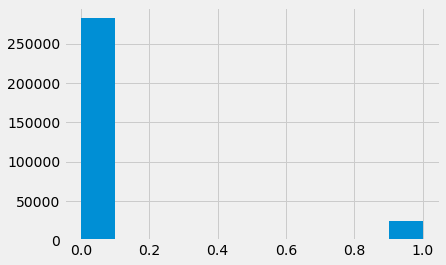

In [6]:
# lets visualize the TARGET values in a histogram
train_df.TARGET.hist();

This helps us visualize the difference between loans repaid on time and loans that were not repaid. 

### Lets look for the missing values

In [7]:
# create a func to calculate missing values by column
def missing_values_table(df):
    
    # total mising values
    mis_val = df.isnull().sum()
    
    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    # Sort the table by percentage of missing desc
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print Summary information
    print ("Your selected df has " + str(df.shape[1])
          + " columns. " "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the df with missing info
    return mis_val_table_ren_columns

In [8]:
# missing values statistics
missing_values = missing_values_table(train_df)
missing_values.head(20)

Your selected df has 122 columns. There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [ ]:
# use pandas profile to learn about the missing values
# profile = pp.ProfileReport(train_df)

### From kaggle kernel...

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can [handle missing values with no need for imputation](https://stats.stackexchange.com/questions/235489/xgboost-can-handle-missing-data-in-the-forecasting-phase). Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

<br>
** Column Types **

In [9]:
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

** Cell below doesn't run correctly **

In [ ]:
# lets look at the number of unique classes in each object column
train_df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

**Lets find a way to encode (represent) these categorical variables
as numbers before handing them off to the model.**

* **Label enconding** - assign each unique category in a categorical varibable with an integer. No new columns are created.

* **One-hot enconding** - create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and 0 in all other new columns

    * ** Use label encoding for any categorical variables with only 2 categories **
    * ** Use one-hot encoding for any categorical variables with more than 2 categories **

In [10]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

In [11]:
# loop through columns
for col in train_df:
    if train_df[col].dtype == 'object':
        
        # If 2 or fewer unqiue categories
        if len(list(train_df[col].unique())) <= 2:
            
            # Train on the training data
            le.fit(train_df[col])
            
            # tranform both rain and test data
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])
            
            # keep track of how many cols were label encoded
            le_count += 1
            
print ('%d columns were label encoded.' % le_count)

LabelEncoder()

LabelEncoder()

LabelEncoder()

3 columns were label encoded.


In [12]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Training Features shape: ', train_df.shape)
print('Testing Features shape: ', test_df.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


As we can see above, one-hot encoding added more columns to our training data. We need to **align** the data frames to remove the extra columns in the training df that are not in the test df. 

To **align** we must make sure axis = 1 to align the df based on the columns not on the rows.

In [13]:
train_labels = train_df['TARGET']

# align the train and test data, keep only columns in both
train_df, test_df = train_df.align(test_df, join = 'inner', axis=1)

print('Training Features shape: ', train_df.shape)
print('Testing Features shape: ', test_df.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 239)


After aligning the train and test data, both the train df and test df have the same number of columns (features) which is required for machine learning.

At some point we might want to try [dimensionality reduction (removing features that are not relevant)](https://en.wikipedia.org/wiki/Dimensionality_reduction) to reduce the size of the datasets.

## Back to Exploratory Data Analysis

### Correlations

Now that we have dealt with the categorical variables, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:

* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”

In [14]:
# add target back in to the data
train_df['TARGET'] = train_labels

# find correlations with the target and sort
correlations = train_df.corr()['TARGET'].sort_values()

In [15]:
# Display correlations
print('Most Positive Correlations: \n', correlations.tail(15))
print('\nMost Negative Correlations: \n', correlations.head(15))

Most Positive Correlations: 
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negat

### Effect of Age on Repayment

In [16]:
# find the correlation of the positive days since birth and target
train_df['DAYS_BIRTH'] = abs(train_df['DAYS_BIRTH'])
train_df['DAYS_BIRTH'].corr(train_df['TARGET'])

-0.078239308309827116

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often. 

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

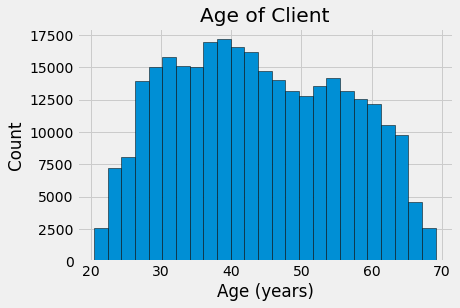

In [17]:
# lets plot a histogram of the age
plt.hist(train_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins= 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a [kernel density estimation plot](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) colored by the value of the target. A [kernel density estimate plot shows the distribution of a single variable](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/) and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn `kdeplot` for this graph.

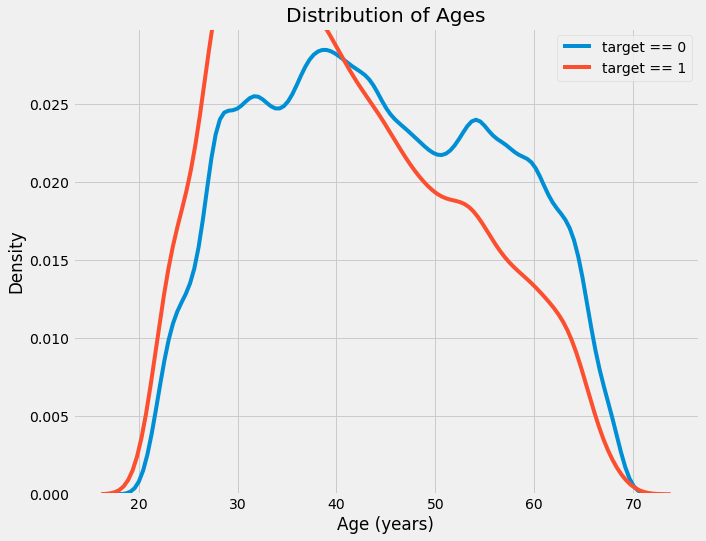

In [47]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365,
           label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365,
           label = 'target == 1')

# label plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [24]:
# Age information into a separate data frame
age_data = train_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] /365

In [25]:
# BIN THE AGE DATA
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'],\
                                 bins = np.linspace(20,70, num =11))

In [48]:
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [40]:
# group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


In [64]:
age_groups['TARGET'] = pd.Series(["{0:.2f}%".format(val * 100) for val in age_groups['TARGET']], index = age_groups.index)

In [65]:
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",12.30%,8532.795625,23.377522
"(25.0, 30.0]",11.14%,10155.219250,27.822518
"(30.0, 35.0]",10.28%,11854.848377,32.479037
"(35.0, 40.0]",8.94%,13707.908253,37.555913
"(40.0, 45.0]",7.85%,15497.661233,42.459346
"(45.0, 50.0]",7.42%,17323.900441,47.462741
"(50.0, 55.0]",6.70%,19196.494791,52.593136
"(55.0, 60.0]",5.53%,20984.262742,57.491131
"(60.0, 65.0]",5.27%,22780.547460,62.412459


In [ ]:
# this cell doesn't run

plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

Ext Source 1,2,3 have the strongest negative correlations. These features represent a normalized score from external data source. 

Here, we'll create a df that we'll use to find correlations between ext source features and the target.

In [55]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


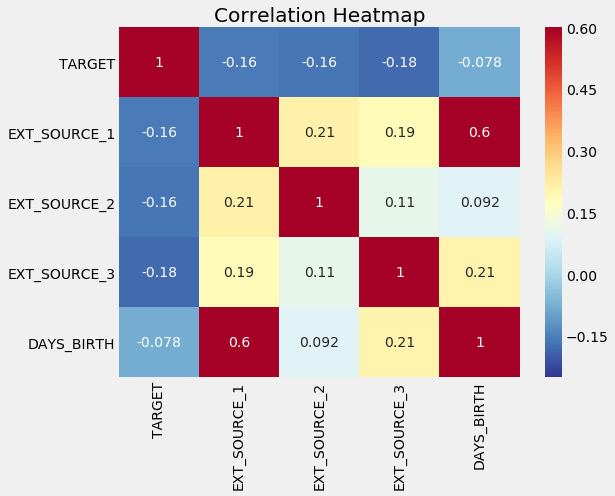

In [56]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

This heat map tells us that all three `EXT_SOURCE` features have negative correlations with the target, indicating that as the value of `EXT_SOURCE` increates, the client is more likely to repay the loan. In additon, we can see that `DAYS_BIRTH` is positively correlated with `EXT_SOURCE1` indicating that one of the factors in this score is the client age.

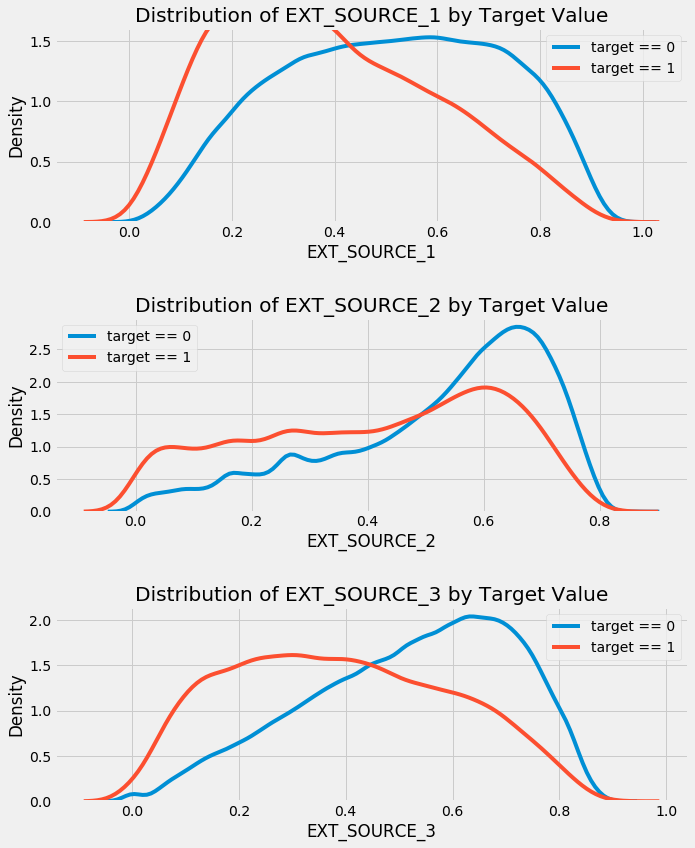

In [60]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1);
    # plot repaid loans
    sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, source], label = 'target == 0');
    # plot loans that were not repaid
    sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, source], label = 'target == 1');
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source);
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5);

`EXT_SOURCE_3` displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all [considered very weak](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

## Feature Engineering

Kaggle competitions are won by feature engineering: those win are those who can create the most useful features out of the data. (This is true for the most part as the winning models, at least for structured data, all tend to be variants on [gradient boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)). This represents one of the patterns in machine learning: feature engineering has a greater return on investment than model building and hyperparameter tuning. [This is a great article on the subject)](https://www.featurelabs.com/blog/secret-to-data-science-success/). As Andrew Ng is fond of saying: "applied machine learning is basically feature engineering." 

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist (and maybe some [automated tools](https://docs.featuretools.com/getting_started/install.html) to help us out).

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.

We will do a lot of feature engineering when we start using the other data sources, but in this notebook we will try only one simple feature construction method: polynomial features. In later notebooks we will work on incorporating information from the other data sources.

<br>
<br>
<br>
<hr>

### Andy EDA